In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/kaggle/input/coffee-reviews-dataset/simplified_coffee.csv')

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1246 non-null   object 
 1   roaster      1246 non-null   object 
 2   roast        1234 non-null   object 
 3   loc_country  1246 non-null   object 
 4   origin       1246 non-null   object 
 5   100g_USD     1246 non-null   float64
 6   rating       1246 non-null   int64  
 7   review_date  1246 non-null   object 
 8   review       1246 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 87.7+ KB
None


In [9]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []

# Ensure we do not exceed the number of rows in the dataset
num_reviews = min(1000, len(df))

for i in range(num_reviews):
    try:
        # Access the 'text' column in the ith row
        review = re.sub('[^a-zA-Z]', ' ', df['review'].iloc[i])
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        corpus.append(review)
    except KeyError as e:
        print(f"KeyError: {e} at index {i}")
    except Exception as e:
        print(f"Unexpected error: {e} at index {i}")


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from gensim import corpora, models
import gensim

# Tokenize your cleaned text (assuming it's stored in the 'clean_text' column)
tokenized_text = [text.split() for text in corpus]

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(tokenized_text)

# Filter out tokens that appear in less than 10 documents or more than 50% of the documents.
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert the documents into a bag-of-words corpus.
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# Train the LDA model.
lda_model = gensim.models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Print the topics.
for idx, topic in lda_model.print_topics():
    print("Topic {}: {}".format(idx, topic))

Topic 0: 0.039*"richli" + 0.035*"savori" + 0.030*"flower" + 0.028*"almond" + 0.023*"full" + 0.022*"syrupi" + 0.021*"long" + 0.020*"tobacco" + 0.020*"honeysuckl" + 0.019*"narcissu"
Topic 1: 0.070*"zest" + 0.039*"grapefruit" + 0.032*"orang" + 0.031*"tart" + 0.031*"chocol" + 0.029*"bake" + 0.025*"pink" + 0.021*"satini" + 0.020*"crispli" + 0.020*"spice"
Topic 2: 0.067*"cocoa" + 0.036*"around" + 0.033*"center" + 0.028*"tart" + 0.027*"freesia" + 0.026*"nib" + 0.025*"oak" + 0.024*"crisp" + 0.023*"powder" + 0.022*"richli"
Topic 3: 0.041*"juici" + 0.036*"tart" + 0.036*"currant" + 0.032*"bright" + 0.032*"syrupi" + 0.026*"black" + 0.024*"long" + 0.024*"cocoa" + 0.024*"flavor" + 0.023*"sweetli"
Topic 4: 0.050*"cocoa" + 0.045*"jasmin" + 0.035*"nib" + 0.032*"savori" + 0.030*"syrupi" + 0.026*"star" + 0.024*"richli" + 0.022*"juici" + 0.022*"tart" + 0.021*"reson"
Topic 5: 0.109*"chocol" + 0.062*"dark" + 0.029*"cedar" + 0.027*"savori" + 0.025*"baker" + 0.023*"richli" + 0.016*"dri" + 0.016*"velveti" + 0.

In [16]:
!pip install pyLDAvis

import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)

In [12]:
import string
from nltk.corpus import stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_no_newline = Test_punc_removed_join.replace('\n', ' ')
    Test_no_stopwords = [word for word in Test_no_newline.split() if word.lower() not in stopwords.words('english')]
    return Test_no_stopwords

data_clean = df['review'].apply(message_cleaning)


In [13]:
data_clean.describe()

count                                                  1246
unique                                                 1246
top       [Crisply, sweet, cocoatoned, Lemon, blossom, r...
freq                                                      1
Name: review, dtype: object

In [14]:
from collections import Counter
import itertools

# Flatten the list of lists into a single list
flat_data_clean = list(itertools.chain.from_iterable(data_clean))

# Perform frequency analysis
word_freq = Counter(flat_data_clean)

# Print the most common words and their frequencies
print("Most common words and their frequencies:")
for word, freq in word_freq.most_common(25):
    print(f"{word}: {freq}")


Most common words and their frequencies:
cup: 1291
aroma: 1247
mouthfeel: 1212
finish: 1186
structure: 1053
acidity: 1025
chocolate: 841
notes: 683
sweet: 623
cocoa: 481
nib: 452
cedar: 429
zest: 391
syrupy: 362
juicy: 332
tart: 326
almond: 323
dark: 313
long: 299
Sweetly: 285
richly: 277
full: 275
Richly: 259
flowers: 254
bright: 252


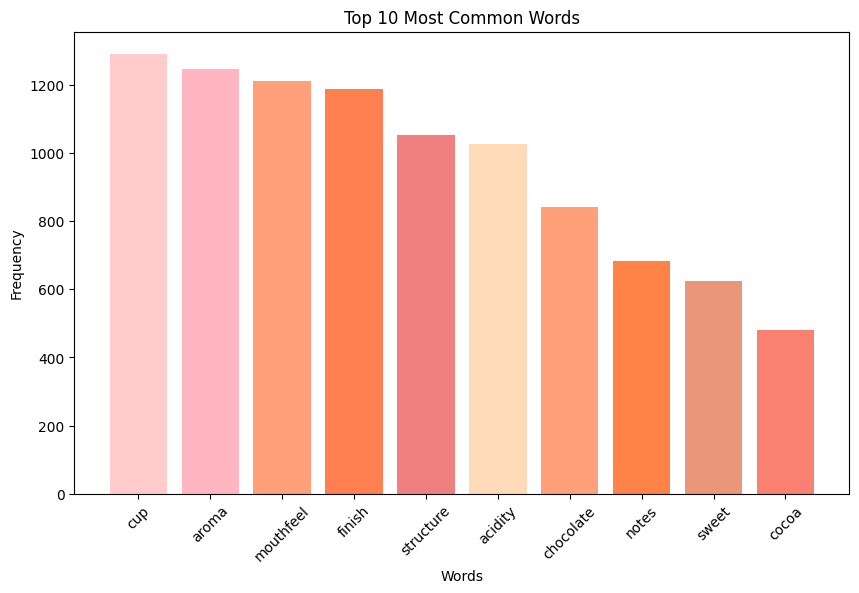

In [15]:
import matplotlib.pyplot as plt

# Define a different pastel color palette
pastel_colors = ['#FFCCCB', '#FFB6C1', '#FFA07A', '#FF7F50', '#F08080',
                 '#FFDAB9', '#FFA07A', '#FF8247', '#E9967A', '#FA8072']

# Get the top 10 most common words and their frequencies
top_10_words = word_freq.most_common(10)

# Separate the words and frequencies
words = [word[0] for word in top_10_words]
frequencies = [word[1] for word in top_10_words]

# Plot the top 10 words and their frequencies using the new pastel colors
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color=pastel_colors)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()
